#Import

In [ ]:
 pip install opencv-contrib-python

In [ ]:
pip install pyyaml h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import fetch_openml #Importation MNIST
import pandas as pd
from sklearn.model_selection import train_test_split #split l'array into random train and test subsets


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,activations 
from keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential


from keras.utils import np_utils
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import h5py

In [ ]:
mnist= fetch_openml('mnist_784') #pas trié
pixels = pd.DataFrame(mnist.data)
labels = pd.DataFrame(mnist.target)

In [ ]:
pixels.shape

(70000, 784)

In [ ]:
labels.shape #target

(70000, 1)

In [ ]:
#X_train ,X_test,  y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7.0) #split l'array into random train and test subsets
X_rem, X_test,  y_rem, y_test= train_test_split(mnist.data, mnist.target, test_size=1/7.0)
X_valid, X_train, y_valid, y_train = train_test_split(X_rem,y_rem, train_size=1/12)

In [ ]:
#le traine en 55 000
#la validation en 5 000
#le test en 10 000

print('Train set :',X_train.shape)
#print(y_train.shape)
print('Validation set :',X_valid.shape)
#print(y_valid.shape)
print('Test set :',X_test.shape)
#print(y_test.shape)

Train set : (55000, 784)
Validation set : (5000, 784)
Test set : (10000, 784)


In [ ]:
# convert class vectors to binary class matrices # Conversion des labels des catégories en encodage one-hot
y_train = np_utils.to_categorical(y_train, 10) #to_categorical is used to convert vector to binary matrix
y_test = np_utils.to_categorical(y_test, 10)
y_valid = np_utils.to_categorical(y_valid, 10)

# RandomForest

In [ ]:
#1 Sélection d'un estimateur
model=RandomForestClassifier()

In [ ]:
#2 Entrainement du modèle sur les données X(avec 2D) ,y=target  (divisées en 2 tableaux Nupy) .fit
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#3 Evaluer le modèle avec la méthode .score
model.score(X_test,y_test)

0.9701

In [ ]:
#4 Utilisation du modèle avec .predict
y_pred=model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9701

In [ ]:
y_test[0]

'0'

In [ ]:
#X_test[0]

In [ ]:
y_predicted=model.predict(X_test[0].reshape(1,-1))

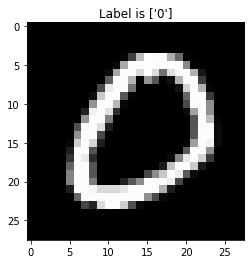

In [ ]:
%matplotlib inline
label = y_predicted
pixel = X_test[0]
pixel = np.array(pixel, dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')
plt.show()

In [ ]:
f1_score(y_test,y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

0.9700745569956051

# DecisionTree

In [ ]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_tree.score(X_test,y_test)

0.8785

In [ ]:
y_pred_tree=model_tree.predict(X_test)

In [ ]:
y_predicted_tree=model_tree.predict(X_test[0].reshape(1,-1))
print(y_predicted_tree)


['0']


In [ ]:
#print('Training Set Evaluation F1-Score=>',f1_score(y_test,y_pred_tree))
# le score f1 est un modèle de matrices d’évaluation de la performance.
f1_score(y_test, y_pred_tree, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

0.8783742063541479

# Naive Bayes

In [ ]:
#Naive Bayes est une technique de classification statistique basée sur le théorème de Bayes

GNBclf = GaussianNB()

In [ ]:
GNBclf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
GNBclf.score(X_test,y_test)

0.5592

In [ ]:
preds = GNBclf.predict(X_test)


In [ ]:
y_predicted=GNBclf.predict(X_test[0].reshape(1,-1))
print(y_predicted)

['0']


In [ ]:
f1_score(y_test, preds, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

0.5199157161786316

#Réseau de neurones 

In [ ]:
#way 2 to build Keras models: sequential
def create_model():
  model = Sequential([
      keras.layers.Dense(64, activation='relu',input_shape = (784,1), name="layer1"),
      keras.layers.Dense(64, activation='relu', name="layer2"),
      keras.layers.Dense(10, activation='softmax', name="layer3")           
  ])
  model.compile(loss='categorical_crossentropy',optimizer='ADAM', metrics=['accuracy'])
  return model


**Prossecus d'apprentisage sans la partie de validation [ Modele M1 ]**

In [ ]:
filepath='model_Train.h5'
model = create_model()
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True,monitor='accuracy',mode='max',save_best_only=True)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5,restore_best_weights=True)
historyFit=model.fit(X_train,y_train,batch_size=128,epochs=500,callbacks=[model_checkpoint_callback,earlyStopping],verbose=2)

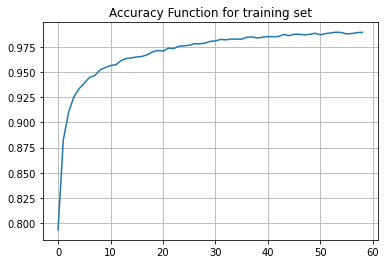

In [ ]:
plt.figure()
plt.plot(historyFit.history['accuracy'])
plt.title('Accuracy Function for training set')
plt.grid()
plt.show()

In [ ]:
#Evaluate the model sur le jeu de donée de teste 
score = model.evaluate(X_test, y_test, verbose=0)

print("Test lost: %.2f%%"%(score[0]*100))# Le premier élément de scores renvoie la fonction de coût sur la
print("Test accuracy: %.2f%%"%(score[1]*100))# renvoie le taux de bonne détection (accuracy)

Test lost: 26.20%
Test accuracy: 96.24%


In [ ]:
print(model.predict(X_test[0].reshape(1,-1)))

[[1.0000000e+00 1.3265898e-38 1.7834400e-16 8.1479999e-19 5.6233580e-22
  7.9223901e-18 9.6322800e-18 7.8841686e-24 9.3816343e-23 3.4564577e-18]]


**Prossessus d'entrainement avec la partie de validation [ Modele M2]**

In [ ]:
 #Train model avec un lot de 128 échantillons
filepath='model_Train_Val.h5'
model = create_model()
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5,restore_best_weights=True)
historyFitVal=model.fit(X_train,y_train,batch_size=128, epochs=500, validation_data=(X_valid, y_valid), callbacks=[model_checkpoint_callback,earlyStopping], verbose=2) #callback va être executé a chaque epoque d'apprentissage

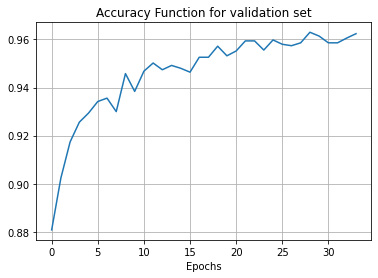

In [ ]:
plt.figure()
plt.plot(historyFitVal.history['val_accuracy'])
plt.title('Accuracy Function for validation set')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [ ]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)

print("Test lost: %.2f%%"%(score[0]*100))# Le premier élément de scores renvoie la fonction de coût sur la
print("Test accuracy: %.2f%%"%(score[1]*100))# renvoie le taux de bonne détection (accuracy)

Test lost: 19.92%
Test accuracy: 96.46%


In [ ]:
print(model.predict(X_test[0].reshape(1,-1)))

[[1.0000000e+00 6.0504379e-34 2.1734125e-30 0.0000000e+00 4.9840262e-25
  1.0980815e-27 1.6815007e-17 8.0493363e-24 1.5909811e-24 5.1163989e-21]]


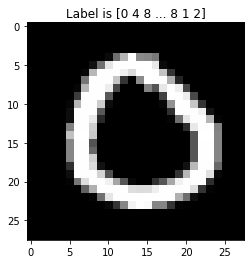

In [ ]:
predictions =np.argmax(model.predict(X_test), axis=-1)
#print(predictions)
%matplotlib inline
label = predictions
pixel = X_test[0]
pixel = np.array(pixel, dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')
plt.show()

In [ ]:
#pour visualiser l’architecture du réseau 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_3 (ModuleWrap (None, 64)                50240     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 64)                4160      
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


<< pour tester le modele check point >>

In [ ]:
# Evaluate the model
model = create_model()
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Untrained model, accuracy: {:5.2f}%, loss: {:5.2f}%".format(100 * acc,100*loss))

Untrained model, accuracy:  9.42%, loss: 26700.19%


In [ ]:
# Loads the weights
model.load_weights('model_Train.h5')
model.load_weights('model_Train_Val.h5')

# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Restored model, accuracy: {:5.2f}%, loss: {:5.2f}%".format(100 * acc,100*loss))
######### FIN Test  ###########

Restored model, accuracy: 96.46%, loss: 19.92%


# CNN LeNet

**Le Net Modele sans validation set**






In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_valid=X_valid.reshape(X_valid.shape[0],28,28,1)

In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
# On converti nos valeurs en float
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_valid=X_valid.astype(float)

# On normalise les pixels pour avoir des valeurs entre 0 et 1
X_train = X_train/255.0
X_test = X_test/255.0
X_valid=X_valid/255.0

In [ ]:
leNet_model=Sequential()
leNet_model.add(keras.layers.Conv2D(64, (5,5),input_shape=X_train.shape[1:], activation='relu'))
leNet_model.add(MaxPooling2D(pool_size=(2,2)))
leNet_model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
leNet_model.add(MaxPooling2D(pool_size=(2,2)))
leNet_model.add(Dropout(0.2))
leNet_model.add(Flatten())
leNet_model.add(Dense(64, activation='relu'))
leNet_model.add(Dense(64, activation='relu'))
leNet_model.add(Dense(10, activation='softmax'))
#compile model
leNet_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
 #Train model avec un lot de 128 échantillons
filepath='model_Train_CNN.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True,monitor='accuracy',mode='max',save_best_only=True)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5,restore_best_weights=True)
historyFitVal=leNet_model.fit(X_train,y_train, epochs=5, callbacks=[model_checkpoint_callback,earlyStopping], verbose=2) #callback va être executé a chaque epoque d'apprentissage

Epoch 1/5
1719/1719 - 54s - loss: 0.1696 - accuracy: 0.9459
Epoch 2/5
1719/1719 - 4s - loss: 0.0570 - accuracy: 0.9821
Epoch 3/5
1719/1719 - 4s - loss: 0.0433 - accuracy: 0.9866
Epoch 4/5
1719/1719 - 4s - loss: 0.0369 - accuracy: 0.9883
Epoch 5/5
1719/1719 - 4s - loss: 0.0309 - accuracy: 0.9900


In [ ]:
# Final evaluation of the model
scores = leNet_model.evaluate(X_test, y_test, verbose=0)
print("Model score : %.2f%%" % (scores[1]*100))
print("Model error rate : %.2f%%" % (100-scores[1]*100))

Model score : 98.86%
Model error rate : 1.14%


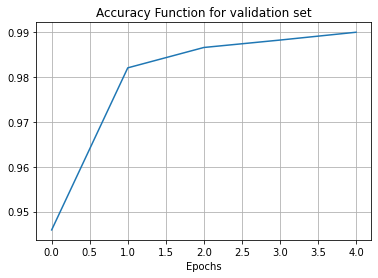

In [ ]:
plt.figure()
plt.plot(historyFitVal.history['accuracy'])
plt.title('Accuracy Function for validation set')
plt.xlabel('Epochs')
plt.grid()
plt.show()

**Modele M2 Avec validation set**

In [ ]:
X_valid.shape

(5000, 28, 28, 1)

In [ ]:
leNet_model2=Sequential()
#leNet_model2.add(keras.layers.Reshape((28,28,1),input_shape=X_train.shape[1:]))
leNet_model2.add(keras.layers.Conv2D(64, (3,3),input_shape=X_train.shape[1:], activation='relu'))
leNet_model2.add(MaxPooling2D(pool_size=(2,2)))
leNet_model2.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
leNet_model2.add(MaxPooling2D(pool_size=(2,2)))
leNet_model2.add(Dropout(0.2))
leNet_model2.add(Flatten())
leNet_model2.add(Dense(64, activation='relu'))
leNet_model2.add(Dense(64, activation='relu'))
leNet_model2.add(Dense(10, activation='softmax'))
leNet_model2.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
X_valid.shape

(5000, 28, 28, 1)

In [ ]:
 #Train model avec un lot de 128 échantillons
filepath='model_Train_CNN.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5,restore_best_weights=True)
historyFitVal=leNet_model2.fit(X_train,y_train,batch_size=128, epochs=50, validation_data=(X_valid,y_valid),callbacks=[model_checkpoint_callback,earlyStopping], verbose=2) #callback va être executé a chaque epoque d'apprentissageleNet_model2.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=200)

Epoch 1/50
430/430 - 4s - loss: 1.2965 - accuracy: 0.5447 - val_loss: 108.5238 - val_accuracy: 0.6964
Epoch 2/50
430/430 - 2s - loss: 0.4780 - accuracy: 0.8503 - val_loss: 47.0773 - val_accuracy: 0.8560
Epoch 3/50
430/430 - 2s - loss: 0.3465 - accuracy: 0.8917 - val_loss: 36.7523 - val_accuracy: 0.8940
Epoch 4/50
430/430 - 2s - loss: 0.2658 - accuracy: 0.9169 - val_loss: 40.5202 - val_accuracy: 0.8962
Epoch 5/50
430/430 - 2s - loss: 0.2079 - accuracy: 0.9359 - val_loss: 39.0928 - val_accuracy: 0.9054
Epoch 6/50
430/430 - 2s - loss: 0.1717 - accuracy: 0.9471 - val_loss: 32.7454 - val_accuracy: 0.9192
Epoch 7/50
430/430 - 2s - loss: 0.1484 - accuracy: 0.9541 - val_loss: 37.9859 - val_accuracy: 0.9068
Epoch 8/50
430/430 - 2s - loss: 0.1330 - accuracy: 0.9584 - val_loss: 31.7266 - val_accuracy: 0.9222
Epoch 9/50
430/430 - 2s - loss: 0.1201 - accuracy: 0.9625 - val_loss: 35.8023 - val_accuracy: 0.9130
Epoch 10/50
430/430 - 2s - loss: 0.1107 - accuracy: 0.9656 - val_loss: 62.3430 - val_accur

In [ ]:
scores = leNet_model2.evaluate(X_test, y_test, verbose=0)
print("Model score : %.2f%%" % (scores[1]*100))
print("Model error rate : %.2f%%" % (100-scores[1]*100))


#leNet_model2.load_weights(filepath)
#scores = leNet_model2.evaluate(X_test, y_test, verbose=0)
#print("Model score : %.2f%%" % (scores[1]*100))
#print("Model error rate : %.2f%%" % (100-scores[1]*100))


Model score : 96.81%
Model error rate : 3.19%


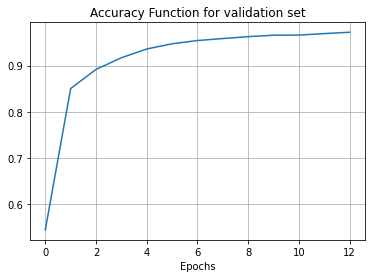

In [ ]:
plt.figure()
plt.plot(historyFitVal.history['accuracy'])
plt.title('Accuracy Function for validation set')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [ ]:
#https://colab.research.google.com/drive/18H1YZ5cp9OpuyyNFZw3Nja6ipA5F4me2#scrollTo=XnSoKJCKbKQi